In [2]:
import torch
import numpy as np
import math
import matplotlib.pyplot as plt
import IPython.display as ipd
import soundfile as sf

## Load Audio File

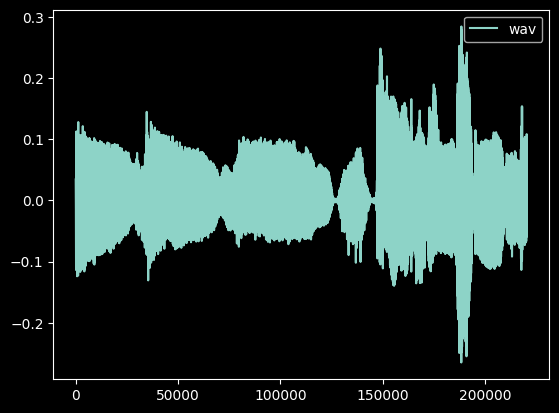

In [5]:
AUDIO_PATH = './test.wav'
wav, sr = sf.read(AUDIO_PATH)

ipd.display(ipd.Audio(data=wav, rate=sr, normalize=False))
plt.figure(dpi=100)
plt.plot(wav,      label='wav')
plt.legend()

## Parametric EQ

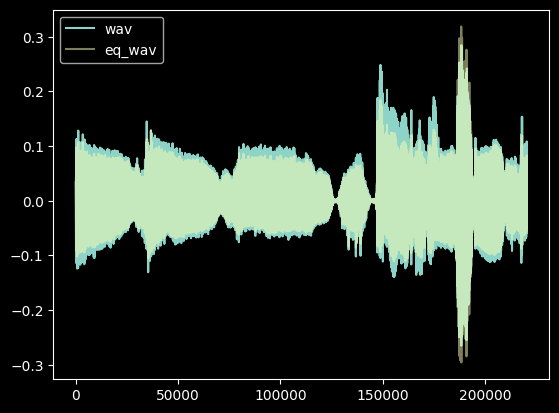

In [6]:
from diffFx_pytorch.processors.eq import ParametricEqualizer

TONE_DSP_PARAMS = {
    # Low shelf parameters
    'low_shelf_gain_db': -2.0,
    'low_shelf_frequency': 100.0,
    'low_shelf_q_factor': 0.707,
    f'peak_1_gain_db': -5.0,
    f'peak_1_frequency': 1000.0,
    f'peak_1_q_factor': 0.707,
    # High shelf parameters
    'high_shelf_gain_db': 4.0,
    'high_shelf_frequency': 10000.0,
    'high_shelf_q_factor': 0.707,
}

Processor = ParametricEqualizer(sample_rate=sr, num_peak_filters=1).to('cuda')
test_wav = torch.from_numpy(wav).unsqueeze(0).unsqueeze(0).float().to('cuda')

eq_wav = Processor(test_wav, None, TONE_DSP_PARAMS)

ipd.display(ipd.Audio(data=wav, rate=sr, normalize=False))
ipd.display(ipd.Audio(data=eq_wav.squeeze().cpu().numpy(), rate=sr, normalize=False))

plt.figure(dpi=100)
plt.plot(wav,      label='wav')
plt.plot(eq_wav.squeeze().cpu().numpy(),      alpha=0.5,label='eq_wav')
plt.legend()